### Import modules

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [2]:
# searching files
all_files = os.listdir('dataset')

In [3]:
# combining info from all files into one dataframe
data = None

for f in all_files:
    data_f = pd.read_csv(f'dataset/{f}', sep=';')
    
    if data is None:
        data = data_f.copy()
        continue
    
    data = data.append(data_f, ignore_index=True)

### Data understanding

In [4]:
# checking first 5 rows
data.head()

ДатаЧека       НомерЧека ВидОперации  АЗСКод ВидНоменклатуры  \
0  16.12.2019 00:09:30  26171000011408  Начисление    2617   Нефтепродукты   
1  16.12.2019 00:09:34  37151000009864  Начисление    3715         Сопутка   
2  16.12.2019 00:11:14  35081000014146  Начисление    3508         Сопутка   
3  16.12.2019 00:11:14  35081000014146  Начисление    3508         Сопутка   
4  16.12.2019 00:11:14  35081000014146  Начисление    3508         Сопутка   

                              Карта ОсновнаяКарта  НомерСтроки  \
0  F9CF1DC89C51CEC7AADC699E41D3B5FA           NaN            1   
1  47A4505237411EDFCF7FB7352D871839           NaN            1   
2  7BE05F497977C0DE8903D25EBC664D3A           NaN            1   
3  7BE05F497977C0DE8903D25EBC664D3A           NaN            2   
4  7BE05F497977C0DE8903D25EBC664D3A           NaN            3   

   НоменклатураКод Количество   Цена Сумма Бонусы СуммаСкидки  \
0           145236      10,35  28,99   300  1 552        0,05   
1           136788          2     37    74     74           0   
2           210952          1     48    48      0           0   
3           232064          1     26    26      0           0   
4           232075          1     28    28      0           0   

   УниверсальнаяАкцияКод СписаноБонусов  СуммаСкидкиДисконт  \
0                    NaN              0                   0   
1                    NaN              0                   0   
2                    NaN              0                   0   
3                    NaN              0                   0   
4                    NaN              0                   0   

                          КассоваяСмена                       ОператорКод  \
0  af656c5c-1f86-11ea-931b-00012eb1adb5             Федів Ірина Василівна   
1  1b2cac5c-1f87-11ea-b05b-00012eb1a3ee       Буднік Олексій Геннадійович   
2  a2937477-1f86-11ea-9b3a-00012eb19bcf  Турусова Анастасія Володимирівна   
3  a2937477-1f86-11ea-9b3a-00012eb19bcf  Турусова Анастасія Володимирівна   
4  a2937477-1f86-11ea-9b3a-00012eb19bcf  Турусова Анастасія Володимирівна   

   Unnamed: 19  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [5]:
# info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91903 entries, 0 to 91902
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ДатаЧека               91903 non-null  object 
 1   НомерЧека              91903 non-null  int64  
 2   ВидОперации            91903 non-null  object 
 3   АЗСКод                 91903 non-null  int64  
 4   ВидНоменклатуры        91903 non-null  object 
 5   Карта                  91901 non-null  object 
 6   ОсновнаяКарта          127 non-null    object 
 7   НомерСтроки            91903 non-null  int64  
 8   НоменклатураКод        91903 non-null  int64  
 9   Количество             91903 non-null  object 
 10  Цена                   91903 non-null  object 
 11  Сумма                  91903 non-null  object 
 12  Бонусы                 91903 non-null  object 
 13  СуммаСкидки            91903 non-null  object 
 14  УниверсальнаяАкцияКод  11445 non-null  float64
 15  Сп

In [6]:
# adding labels

In [7]:
data['label'] = 0

In [8]:
labels = pd.read_csv('other_data/card_69.csv').values

In [9]:
for i in labels:
    data.loc[data['Карта'] == i[0], 'label'] = 1

In [ ]:
#count fraud

In [10]:
len(data.loc[data['label']==1])

1458

### Preparing and filtering data

In [11]:
# filtering rows
data = data[data['ВидОперации']!='Начисление возврат']
data = data[data['ВидОперации']!='Начисление оплата возврат']

In [12]:
# filtering rows
data = data[data['ВидНоменклатуры']=='Нефтепродукты']

# removing the column
# data = data.drop('ВидНоменклатуры', axis=1)

In [13]:
# remove cards with less than 5 operations
card_data = data.groupby('Карта').count()
delete_list = card_data[card_data['ДатаЧека']<5].index
for i in delete_list:
    data = data[data['Карта'] != i]

In [14]:
# remove other discounts
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].fillna(0)
data = data[data['УниверсальнаяАкцияКод'] < 300]

In [15]:
# remove cards with more than 1 station
many_st = []
for i in set(data['Карта'].values):
    if len(set(data.loc[data['Карта']==i]['АЗСКод'].values)) > 1: 
        many_st.append(i)
        
for j in many_st:
    data = data[data['Карта'] != j]

In [185]:
#TODO:
# date ?
# operators

In [15]:
data

ДатаЧека       НомерЧека        ВидОперации  АЗСКод  \
0      16.12.2019 00:09:30  26171000011408         Начисление    2617   
10     16.12.2019 00:15:01  19334000201587         Начисление    1933   
13     16.12.2019 00:19:04  30411000034467  Начисление оплата    3041   
34     16.12.2019 00:33:42  35081000014152  Начисление оплата    3508   
42     16.12.2019 00:40:39  19334000201599         Начисление    1933   
...                    ...             ...                ...     ...   
91874  27.12.2019 23:03:09  30271000013658         Начисление    3027   
91875  27.12.2019 23:04:27  30271000013659         Начисление    3027   
91890  27.12.2019 23:25:14  30271000013664         Начисление    3027   
91891  27.12.2019 23:28:18  19334000210785  Начисление оплата    1933   
91898  27.12.2019 23:41:09  30271000013672         Начисление    3027   

      ВидНоменклатуры                             Карта ОсновнаяКарта  \
0       Нефтепродукты  F9CF1DC89C51CEC7AADC699E41D3B5FA           NaN   
10      Нефтепродукты  840EC2C58567D8AAA044E6C6D20E0D20           NaN   
13      Нефтепродукты  E90AB87C4C98C13CDB2E36FEAF9637E9           NaN   
34      Нефтепродукты  498A6DDC19B204D288465C38085938D7           NaN   
42      Нефтепродукты  D85BD7BDD888729BA02B98F56DD71B28           NaN   
...               ...                               ...           ...   
91874   Нефтепродукты  962E99BBEA95AADD54009F20198E7A9B           NaN   
91875   Нефтепродукты  A37E057178E5A39589D8031B85306B7A           NaN   
91890   Нефтепродукты  4A3F45341C69C43EDACA1432976D12DA           NaN   
91891   Нефтепродукты  D91EEDDB7B141AF3C644BF115A4DB1BB           NaN   
91898   Нефтепродукты  588E0ED389CC14C867A17CF47BB852EA           NaN   

       НомерСтроки  НоменклатураКод Количество  ...   Сумма Бонусы  \
0                1           145236      10,35  ...     300  1 552   
10               1             2865      36,72  ...  458,26  1 836   
13               1           113355      26,43  ...     700  2 643   
34               1            78566      32,27  ...   1 000  6 454   
42               1             2865      30,13  ...     400  1 506   
...            ...              ...        ...  ...     ...    ...   
91874            1           113355        9,1  ...     250    250   
91875            1             2856      14,04  ...  378,94  2 808   
91890            1           145236      12,34  ...     339    339   
91891            1             2856      10,53  ...     191  1 005   
91898            1           113355      10,92  ...     300  1 638   

      СуммаСкидки УниверсальнаяАкцияКод  СписаноБонусов СуммаСкидкиДисконт  \
0            0,05                   0.0               0                  0   
10          29,38                   3.0               0                  0   
13          66,21                   3.0              13                  0   
34           0,05                   0.0               5                  0   
42           0,13                   0.0               0                  0   
...           ...                   ...             ...                ...   
91874        0,16                   0.0               0                  0   
91875       21,06                   3.0               0                  0   
91890        0,23                   0.0               0                  0   
91891         109                   0.0          10 900                  0   
91898        0,19                   0.0               0                  0   

                              КассоваяСмена                       ОператорКод  \
0      af656c5c-1f86-11ea-931b-00012eb1adb5             Федів Ірина Василівна   
10     ada6e8da-1f86-11ea-ba7d-00012eb1a343        Шебунчак Віктор Степанович   
13     96cdce0d-1f86-11ea-80db-00012eb19fe6                        Кочіш І.І.   
34     a2937477-1f86-11ea-9b3a-00012eb19bcf  Турусова Анастасія Володимирівна   
42     ada6e8da-1f86-11ea-ba7d-00012eb1a343        Шебунчак Віктор Степанович   


In [183]:
for i in labels:
    print(i)
    data.loc[data['Карта'] == i[0]].groupby('ОператорКод').count()
    break

['E1627DA6992F9BD6D6F10EF15B3930F6']


In [184]:
data.loc[data['Карта'] == 'E1627DA6992F9BD6D6F10EF15B3930F6'].groupby('ОператорКод').count()

ДатаЧека  НомерЧека  ВидОперации  АЗСКод  \
ОператорКод                                                                  
Процишин Костянтин Петрович              4          4            4       4   
Тищенко Р.В.                             3          3            3       3   
Турусова Анастасія Володимирівна         1          1            1       1   
Тіщенко Р. В.                            3          3            3       3   

                                  Карта  ОсновнаяКарта  НомерСтроки  \
ОператорКод                                                           
Процишин Костянтин Петрович           4              0            4   
Тищенко Р.В.                          3              0            3   
Турусова Анастасія Володимирівна      1              0            1   
Тіщенко Р. В.                         3              0            3   

                                  НоменклатураКод  Количество  Цена  Сумма  \
ОператорКод                                                                  
Процишин Костянтин Петрович                     4           4     4      4   
Тищенко Р.В.                                    3           3     3      3   
Турусова Анастасія Володимирівна                1           1     1      1   
Тіщенко Р. В.                                   3           3     3      3   

                                  Бонусы  СуммаСкидки  УниверсальнаяАкцияКод  \
ОператорКод                                                                    
Процишин Костянтин Петрович            4            4                      4   
Тищенко Р.В.                           3            3                      3   
Турусова Анастасія Володимирівна       1            1                      1   
Тіщенко Р. В.                          3            3                      3   

                                  СписаноБонусов  СуммаСкидкиДисконт  \
ОператорКод                                                            
Процишин Костянтин Петрович                    4                   4   
Тищенко Р.В.                                   3                   3   
Турусова Анастасія Володимирівна               1                   1   
Тіщенко Р. В.                                  3                   3   

                                  КассоваяСмена  Unnamed: 19  label  
ОператорКод                                                          
Процишин Костянтин Петрович                   4            0      4  
Тищенко Р.В.                                  3            0      3  
Турусова Анастасія Володимирівна              1            0      1  
Тіщенко Р. В.                                 3            0      3

In [178]:
data.loc[data['label']==1].groupby('Карта').count()

ДатаЧека  НомерЧека  ВидОперации  АЗСКод  \
Карта                                                                        
00DC9FCD81231002E2015CF04A2B01C2        11         11           11      11   
011B0CB6B71F1BCD7281DF1486FF9DB0        28         28           28      28   
08B0111E2AEC41E102D267BABF891955        13         13           13      13   
0B6E0056D53EB995A3AA1EC87864CD68        16         16           16      16   
0DA097EDB7758A05566786F095F9A394        24         24           24      24   
...                                    ...        ...          ...     ...   
EE4B00733ECA6984C49CC382E8DB7DD1        29         29           29      29   
F008DAC8F4E8BE94B1EA91F316DA2A5D        13         13           13      13   
FB69355DCE30B5AF1F876678EFAB4E48        17         17           17      17   
FBAE24A5B1F5B675F7E991B30A2E5D7E         7          7            7       7   
FE5A94AF13607C7CA50798F399D1087D        26         26           26      26   

                                  ОсновнаяКарта  НомерСтроки  НоменклатураКод  \
Карта                                                                           
00DC9FCD81231002E2015CF04A2B01C2              0           11               11   
011B0CB6B71F1BCD7281DF1486FF9DB0              0           28               28   
08B0111E2AEC41E102D267BABF891955              0           13               13   
0B6E0056D53EB995A3AA1EC87864CD68              0           16               16   
0DA097EDB7758A05566786F095F9A394              0           24               24   
...                                         ...          ...              ...   
EE4B00733ECA6984C49CC382E8DB7DD1              0           29               29   
F008DAC8F4E8BE94B1EA91F316DA2A5D              0           13               13   
FB69355DCE30B5AF1F876678EFAB4E48              0           17               17   
FBAE24A5B1F5B675F7E991B30A2E5D7E              0            7                7   
FE5A94AF13607C7CA50798F399D1087D              0           26               26   

                                  Количество  Цена  Сумма  Бонусы  \
Карта                                                               
00DC9FCD81231002E2015CF04A2B01C2          11    11     11      11   
011B0CB6B71F1BCD7281DF1486FF9DB0          28    28     28      28   
08B0111E2AEC41E102D267BABF891955          13    13     13      13   
0B6E0056D53EB995A3AA1EC87864CD68          16    16     16      16   
0DA097EDB7758A05566786F095F9A394          24    24     24      24   
...                                      ...   ...    ...     ...   
EE4B00733ECA6984C49CC382E8DB7DD1          29    29     29      29   
F008DAC8F4E8BE94B1EA91F316DA2A5D          13    13     13      13   
FB69355DCE30B5AF1F876678EFAB4E48          17    17     17      17   
FBAE24A5B1F5B675F7E991B30A2E5D7E           7     7      7       7   
FE5A94AF13607C7CA50798F399D1087D          26    26     26      26   

                                  СуммаСкидки  УниверсальнаяАкцияКод  \
Карта                                                                  
00DC9FCD81231002E2015CF04A2B01C2           11                     11   
011B0CB6B71F1BCD7281DF1486FF9DB0           28                     28   
08B0111E2AEC41E102D267BABF891955           13                     13   
0B6E0056D53EB995A3AA1EC87864CD68           16                     16   
0DA097EDB7758A05566786F095F9A394           24                     24   
...                                       ...                    ...   
EE4B00733ECA6984C49CC382E8DB7DD1           29                     29   
F008DAC8F4E8BE94B1EA91F316DA2A5D           13                     13   
FB69355DCE30B5AF1F876678EFAB4E48           17                     17   
FBAE24A5B1F5B675F7E991B30A2E5D7E            7                      7   
FE5A94AF13607C7CA50798F399D1087D           26                     26   

                                  СписаноБонусов  СуммаСкидкиДисконт  \
Карта                                                     

In [174]:
data.loc[data['label']==1].groupby('АЗСКод').count()

ДатаЧека  НомерЧека  ВидОперации  Карта  ОсновнаяКарта  НомерСтроки  \
АЗСКод                                                                        
1941          63         63           63     63              0           63   
2617          82         82           82     82              0           82   
3041          89         89           89     89              0           89   
3108         157        157          157    157              0          157   
3508         231        231          231    231              0          231   
3516         539        539          539    539              0          539   
3715          29         29           29     29              0           29   

        НоменклатураКод  Количество  Цена  Сумма  Бонусы  СуммаСкидки  \
АЗСКод                                                                  
1941                 63          63    63     63      63           63   
2617                 82          82    82     82      82           82   
3041                 89          89    89     89      89           89   
3108                157         157   157    157     157          157   
3508                231         231   231    231     231          231   
3516                539         539   539    539     539          539   
3715                 29          29    29     29      29           29   

        УниверсальнаяАкцияКод  СписаноБонусов  СуммаСкидкиДисконт  \
АЗСКод                                                              
1941                       63              63                  63   
2617                       82              82                  82   
3041                       89              89                  89   
3108                      157             157                 157   
3508                      231             231                 231   
3516                      539             539                 539   
3715                       29              29                  29   

        КассоваяСмена  ОператорКод  Unnamed: 19  label  
АЗСКод                                                  
1941               63           63            0     63  
2617               82           82            0     82  
3041               89           89            0     89  
3108              157          157            0    157  
3508              231          231            0    231  
3516              539          539            0    539  
3715               29           29            0     29

In [97]:
data.loc[data['label']==1].loc[data['Карта']=='00DC9FCD81231002E2015CF04A2B01C2']

ДатаЧека       НомерЧека        ВидОперации  АЗСКод  \
4854   12.12.2019 17:25:17  35081000011191         Начисление    3508   
6141   30.12.2019 09:43:33  35081000028499  Начисление оплата    3508   
14585  25.12.2019 23:00:25  35081000024218  Начисление оплата    3508   
22579  09.12.2019 19:06:13  35081000008123  Начисление оплата    3508   
28154  04.12.2019 18:19:46  35081000003329         Начисление    3508   
28758  06.12.2019 00:19:29  35081000004641         Начисление    3508   
37684  14.12.2019 00:14:39  35081000012499  Начисление оплата    3508   
52693  17.12.2019 19:04:23  35081000016014  Начисление оплата    3508   
59628  02.12.2019 06:48:02  35081000000778  Начисление оплата    3508   
67102  20.12.2019 14:44:38  35081000019025  Начисление оплата    3508   
78474  28.12.2019 13:35:42  35081000027067         Начисление    3508   

                                  Карта ОсновнаяКарта  НомерСтроки  \
4854   00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
6141   00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
14585  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
22579  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
28154  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
28758  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
37684  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
52693  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
59628  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
67102  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   
78474  00DC9FCD81231002E2015CF04A2B01C2           NaN            1   

       НоменклатураКод Количество   Цена     Сумма  Бонусы СуммаСкидки  \
4854              2856      33,35  29,99    966,82   6 670       33,35   
6141            145236      12,83  27,29    250,72   1 908       99,41   
14585             2856      10,35  28,99    222,36   1 588       77,69   
22579             2856       16,4  30,49    369,46   2 506      130,58   
28154            78566      15,73  31,79    484,33   3 146       15,73   
28758             2856       32,7  30,59    967,59   6 540        32,7   
37684            78566      32,27  30,99       876   5 842      124,05   
52693            78525      74,65  33,49  2 366,96  14 570      133,07   
59628             2856         10  30,79    257,98   1 732       49,92   
67102             2856      38,75  29,69       966   6 734      184,49   
78474             2856      35,35  28,29     964,7   7 070       35,35   

       УниверсальнаяАкцияКод СписаноБонусов  СуммаСкидкиДисконт  \
4854                     3.0              0                   0   
6141                     3.0          8 658                   0   
14585                    3.0          6 734                   0   
22579                    3.0         11 418                   0   
28154                    3.0              0                   0   
28758                    3.0              0                   0   
37684                    3.0          9 176                   0   
52693                    3.0          5 842                   0   
59628                    3.0          3 992                   0   
67102                    3.0         14 570                   0   
78474                    3.0              0                   0   

                              КассоваяСмена                       ОператорКод  \
4854   07bee5c1-1c62-11ea-9b39-00012eb19bcf       Процишин Костянтин Петрович   
6141   8c154fdf-2a89-11ea-9b3d-00012eb19bcf  Турусова Анастасія Володимирівна   
14585  0a45fe38-2699-11ea-9b3b-00012eb19bcf       Процишин Костянтин Петрович   
22579  6f215493-1a06-11ea-9b39-00012eb19bcf       Лучко Євгенія Олександрівна   
28154  d5417dfc-1618-11ea-9b34-00012eb19bcf       Процишин Костянтин Петрович   
28758  151e8066-17ab-11ea-9b37-00012eb19bcf       Процишин Костянтин Петрович   
37684  6538e839-1df4-11ea-9b39-00012eb1

In [100]:
labels[1][0]

'D62DF2C0945E73A4E4C32500E3A67AD8'

In [124]:
for i in labels:
    x = data.loc[data['Карта']==i[0]]['АЗСКод'].values
    print(x)
    break

[3508 3508 3508 3508 3508 3508 3508 3508 3508 3508 3508]


In [128]:
xx = data.loc[data['label']!=1]['Карта'].values

In [160]:
many_st = []
for i in set(data['Карта'].values):
    if len(set(data.loc[data['Карта']==i]['АЗСКод'].values)) > 1: 
        many_st.append(i)

In [159]:
many_st = []

In [161]:
len(many_st)

200

In [150]:
yy = data.loc[data['label']==1]['Карта'].values

In [154]:
for i in set(yy):
    x = data.loc[data['Карта']==i]['АЗСКод'].values
    if len(set(x)) == 1: 
        sfsdf.append(i)

In [155]:
len(sfsdf)

66

In [58]:
data[data['УниверсальнаяАкцияКод']==224.0].loc[data['label']==1]

ДатаЧека       НомерЧека ВидОперации  АЗСКод  \
432    16.12.2019 08:26:01  35162000009529  Начисление    3516   
448    16.12.2019 08:32:04  30411000034552  Начисление    3041   
456    16.12.2019 08:36:31  35162000009538  Начисление    3516   
470    16.12.2019 08:40:37  35162000009542  Начисление    3516   
481    16.12.2019 08:43:20  35162000009546  Начисление    3516   
...                    ...             ...         ...     ...   
90543  27.12.2019 15:11:05  35162000016990  Начисление    3516   
90636  27.12.2019 15:35:32  35162000017013  Начисление    3516   
90652  27.12.2019 15:39:41  35162000017018  Начисление    3516   
90738  27.12.2019 16:03:27  35162000017029  Начисление    3516   
90813  27.12.2019 16:24:21  35162000017046  Начисление    3516   

                                  Карта ОсновнаяКарта  НомерСтроки  \
432    5794F9D47FDEE1D4A26B06043F67DC3C           NaN            1   
448    D6C2CB7292DF57079E1CC2AB999C3CDC           NaN            1   
456    72CBCE8C05E91763BE80573CA70A1E6A           NaN            1   
470    718CFB8623F87B327AF57655CD2DEE16           NaN            1   
481    9F909BE02D351A9D728F6AFC7B4E4E44           NaN            1   
...                                 ...           ...          ...   
90543  BCCEEF7FBA83397F2E609383F92E2BB0           NaN            1   
90636  E1245EA55B7C77754EA80A6255D5CB14           NaN            1   
90652  782674142943F37D7E9336417898852D           NaN            1   
90738  FE5A94AF13607C7CA50798F399D1087D           NaN            1   
90813  5794F9D47FDEE1D4A26B06043F67DC3C           NaN            1   

       НоменклатураКод Количество   Цена  Сумма  Бонусы СуммаСкидки  \
432               2856      10,01  29,99    300   3 504         0,2   
448             145236        6,9  28,99    200   2 415        0,03   
456             113355      10,35  28,99    300   3 623        0,05   
470             113355      17,25  28,99    500   6 038        0,08   
481               2856      10,01  29,99    300   3 504         0,2   
...                ...        ...    ...    ...     ...         ...   
90543           113355      14,56  27,49    400   5 096        0,25   
90636           145236      36,38  27,49  1 000  12 733        0,09   
90652             2856      17,55  28,49    500   6 143           0   
90738           113355       9,03  27,49    248   3 161        0,23   
90813             2856      14,04  28,49    400   4 914           0   

       УниверсальнаяАкцияКод СписаноБонусов  СуммаСкидкиДисконт  \
432                    224.0              0                   0   
448                    224.0              0                   0   
456                    224.0              0                   0   
470                    224.0              0                   0   
481                    224.0              0                   0   
...                      ...            ...                 ...   
90543                  224.0              0                   0   
90636                  224.0              0                   0   
90652                  224.0              0                   0   
90738                  224.0              0                   0   
90813                  224.0              0                   0   

                              КассоваяСмена          ОператорКод  Unnamed: 19  \
432    94debc33-1f86-11ea-bf62-00012e5b1bd1  Гуля Євген Ігорович          NaN   
448    96cdce0d-1f86-11ea-80db-00012eb19fe6           Кочіш І.І.          NaN   
456    94debc33-1f86-11ea-bf62-00012e5b1bd1  Гуля Євген Ігорович          NaN   
470    94debc33-1f86-11ea-bf62-00012e5b1bd1  Гуля Євген Ігорович          NaN   
481    94debc33-1f86-11ea-bf62-00012e5b1bd1  Гуля Євген Ігорович          NaN   
...                                     ...                  ...          ...   
90543  5fc8bc80-282b-11ea-bf70-00012e5b1bd1  Гуля Євген Ігорович          NaN   
90636  5fc8bc80-282b-11ea-bf70-00012e5b1bd1  Гуля Євген Ігорович          NaN 

In [36]:
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].fillna(0)

In [37]:
data['УниверсальнаяАкцияКод']

0        0.0
10       3.0
13       3.0
34       0.0
42       0.0
        ... 
91874    0.0
91875    3.0
91890    0.0
91891    0.0
91898    0.0
Name: УниверсальнаяАкцияКод, Length: 18619, dtype: float64

In [14]:
card_data = data.groupby('Карта').count()

In [15]:
card_data = card_data[card_data['ДатаЧека']<5]

In [157]:
card_list = list(card_data[card_data['ДатаЧека']>10].index)
counter = 0
for i in labels:
    if i[0] in card_list:
        counter += 1
print(counter)

54


In [16]:
delete_list = card_data[card_data['ДатаЧека']<5].index

In [17]:
for i in delete_list:
    data = data[data['Карта'] != i]

In [18]:
len(data)

18619

In [45]:
data.loc[data['label']==1].groupby('УниверсальнаяАкцияКод').count()

ДатаЧека  НомерЧека  ВидОперации  АЗСКод  Карта  \
УниверсальнаяАкцияКод                                                    
0.0                         418        418          418     418    418   
3.0                         313        313          313     313    313   
224.0                       459        459          459     459    459   

                       ОсновнаяКарта  НомерСтроки  НоменклатураКод  \
УниверсальнаяАкцияКод                                                
0.0                                0          418              418   
3.0                                0          313              313   
224.0                              0          459              459   

                       Количество  Цена  Сумма  Бонусы  СуммаСкидки  \
УниверсальнаяАкцияКод                                                 
0.0                           418   418    418     418          418   
3.0                           313   313    313     313          313   
224.0                         459   459    459     459          459   

                       СписаноБонусов  СуммаСкидкиДисконт  КассоваяСмена  \
УниверсальнаяАкцияКод                                                      
0.0                               418                 418            418   
3.0                               313                 313            313   
224.0                             459                 459            459   

                       ОператорКод  Unnamed: 19  label  
УниверсальнаяАкцияКод                                   
0.0                            418            0    418  
3.0                            313            0    313  
224.0                          459            0    459

In [46]:
data.loc[data['label']!=1].groupby('УниверсальнаяАкцияКод').count()

ДатаЧека  НомерЧека  ВидОперации  АЗСКод  Карта  \
УниверсальнаяАкцияКод                                                    
0.0                       13376      13376        13376   13376  13376   
3.0                        3680       3680         3680    3680   3680   
224.0                       110        110          110     110    110   
1980.0                       86         86           86      86     86   
3067.0                       15         15           15      15     15   
3068.0                       13         13           13      13     13   
3073.0                       71         71           71      71     71   
3834.0                        1          1            1       1      1   
4436.0                        4          4            4       4      4   
4438.0                        2          2            2       2      2   
4439.0                        5          5            5       5      5   
4900.0                        9          9            9       9      9   
4902.0                       57         57           57      57     57   

                       ОсновнаяКарта  НомерСтроки  НоменклатураКод  \
УниверсальнаяАкцияКод                                                
0.0                                4        13376            13376   
3.0                                6         3680             3680   
224.0                              0          110              110   
1980.0                             0           86               86   
3067.0                             0           15               15   
3068.0                             0           13               13   
3073.0                             0           71               71   
3834.0                             0            1                1   
4436.0                             0            4                4   
4438.0                             0            2                2   
4439.0                             0            5                5   
4900.0                             0            9                9   
4902.0                             3           57               57   

                       Количество   Цена  Сумма  Бонусы  СуммаСкидки  \
УниверсальнаяАкцияКод                                                  
0.0                         13376  13376  13376   13376        13376   
3.0                          3680   3680   3680    3680         3680   
224.0                         110    110    110     110          110   
1980.0                         86     86     86      86           86   
3067.0                         15     15     15      15           15   
3068.0                         13     13     13      13           13   
3073.0                         71     71     71      71           71   
3834.0                          1      1      1       1            1   
4436.0                          4      4      4       4            4   
4438.0                          2      2      2       2            2   
4439.0                          5      5      5       5            5   
4900.0                          9      9      9       9            9   
4902.0                         57     57     57      57           57   

                       СписаноБонусов  СуммаСкидкиДисконт  КассоваяСмена  \
УниверсальнаяАкцияКод                                                      
0.0                             13376               13376          13376   
3.0                              3680                3680           3680   
224.0                             110                 110            110   
1980.0                             86                  86             86   
3067.0                             15                  15             15   
3068.0                             13                  13             13   
3073.0                             71                  71             71   
3834.0                              1                   1              1   
4436.0              

In [52]:
data = data[data['УниверсальнаяАкцияКод'] < 300]

In [51]:
data[data['УниверсальнаяАкцияКод'] < 300].groupby('Карта').count()

ДатаЧека  НомерЧека  ВидОперации  АЗСКод  \
Карта                                                                        
00102E75F1A03624D9204DABF181FF4B         9          9            9       9   
002043206DC69131FC6444B0880F2D07         6          6            6       6   
0049F1FFC58BD9977F50E56C71D5536B        12         12           12      12   
005595BFFC7222DBB557E59A3872E56D         7          7            7       7   
00DC9FCD81231002E2015CF04A2B01C2        11         11           11      11   
...                                    ...        ...          ...     ...   
FFB15344B2C229AB011D616A81EB9D10         8          8            8       8   
FFB1A367E4B62FB268767E712E404986         5          5            5       5   
FFD689128D88650F6820A54E3604DD09         5          5            5       5   
FFD8567FF1048ABD2B486C2D08FE3B34         9          9            9       9   
FFDDE5951E14CA31FA92F14FDF88CFB1         8          8            8       8   

                                  ОсновнаяКарта  НомерСтроки  НоменклатураКод  \
Карта                                                                           
00102E75F1A03624D9204DABF181FF4B              0            9                9   
002043206DC69131FC6444B0880F2D07              0            6                6   
0049F1FFC58BD9977F50E56C71D5536B              0           12               12   
005595BFFC7222DBB557E59A3872E56D              0            7                7   
00DC9FCD81231002E2015CF04A2B01C2              0           11               11   
...                                         ...          ...              ...   
FFB15344B2C229AB011D616A81EB9D10              0            8                8   
FFB1A367E4B62FB268767E712E404986              0            5                5   
FFD689128D88650F6820A54E3604DD09              0            5                5   
FFD8567FF1048ABD2B486C2D08FE3B34              0            9                9   
FFDDE5951E14CA31FA92F14FDF88CFB1              0            8                8   

                                  Количество  Цена  Сумма  Бонусы  \
Карта                                                               
00102E75F1A03624D9204DABF181FF4B           9     9      9       9   
002043206DC69131FC6444B0880F2D07           6     6      6       6   
0049F1FFC58BD9977F50E56C71D5536B          12    12     12      12   
005595BFFC7222DBB557E59A3872E56D           7     7      7       7   
00DC9FCD81231002E2015CF04A2B01C2          11    11     11      11   
...                                      ...   ...    ...     ...   
FFB15344B2C229AB011D616A81EB9D10           8     8      8       8   
FFB1A367E4B62FB268767E712E404986           5     5      5       5   
FFD689128D88650F6820A54E3604DD09           5     5      5       5   
FFD8567FF1048ABD2B486C2D08FE3B34           9     9      9       9   
FFDDE5951E14CA31FA92F14FDF88CFB1           8     8      8       8   

                                  СуммаСкидки  УниверсальнаяАкцияКод  \
Карта                                                                  
00102E75F1A03624D9204DABF181FF4B            9                      9   
002043206DC69131FC6444B0880F2D07            6                      6   
0049F1FFC58BD9977F50E56C71D5536B           12                     12   
005595BFFC7222DBB557E59A3872E56D            7                      7   
00DC9FCD81231002E2015CF04A2B01C2           11                     11   
...                                       ...                    ...   
FFB15344B2C229AB011D616A81EB9D10            8                      8   
FFB1A367E4B62FB268767E712E404986            5                      5   
FFD689128D88650F6820A54E3604DD09            5                      5   
FFD8567FF1048ABD2B486C2D08FE3B34            9                      9   
FFDDE5951E14CA31FA92F14FDF88CFB1            8                      8   

                                  СписаноБонусов  СуммаСкидкиДисконт  \
Карта                                                     

In [79]:
data

ДатаЧека       НомерЧека        ВидОперации  АЗСКод  \
0      16.12.2019 00:09:30  26171000011408         Начисление    2617   
10     16.12.2019 00:15:01  19334000201587         Начисление    1933   
13     16.12.2019 00:19:04  30411000034467  Начисление оплата    3041   
34     16.12.2019 00:33:42  35081000014152  Начисление оплата    3508   
42     16.12.2019 00:40:39  19334000201599         Начисление    1933   
...                    ...             ...                ...     ...   
91874  27.12.2019 23:03:09  30271000013658         Начисление    3027   
91875  27.12.2019 23:04:27  30271000013659         Начисление    3027   
91890  27.12.2019 23:25:14  30271000013664         Начисление    3027   
91891  27.12.2019 23:28:18  19334000210785  Начисление оплата    1933   
91898  27.12.2019 23:41:09  30271000013672         Начисление    3027   

                                  Карта ОсновнаяКарта  НомерСтроки  \
0      F9CF1DC89C51CEC7AADC699E41D3B5FA           NaN            1   
10     840EC2C58567D8AAA044E6C6D20E0D20           NaN            1   
13     E90AB87C4C98C13CDB2E36FEAF9637E9           NaN            1   
34     498A6DDC19B204D288465C38085938D7           NaN            1   
42     D85BD7BDD888729BA02B98F56DD71B28           NaN            1   
...                                 ...           ...          ...   
91874  962E99BBEA95AADD54009F20198E7A9B           NaN            1   
91875  A37E057178E5A39589D8031B85306B7A           NaN            1   
91890  4A3F45341C69C43EDACA1432976D12DA           NaN            1   
91891  D91EEDDB7B141AF3C644BF115A4DB1BB           NaN            1   
91898  588E0ED389CC14C867A17CF47BB852EA           NaN            1   

       НоменклатураКод Количество   Цена   Сумма Бонусы СуммаСкидки  \
0               145236      10,35  28,99     300  1 552        0,05   
10                2865      36,72  13,28  458,26  1 836       29,38   
13              113355      26,43  28,99     700  2 643       66,21   
34               78566      32,27  30,99   1 000  6 454        0,05   
42                2865      30,13  13,28     400  1 506        0,13   
...                ...        ...    ...     ...    ...         ...   
91874           113355        9,1  27,49     250    250        0,16   
91875             2856      14,04  28,49  378,94  2 808       21,06   
91890           145236      12,34  27,49     339    339        0,23   
91891             2856      10,53  28,49     191  1 005         109   
91898           113355      10,92  27,49     300  1 638        0,19   

       УниверсальнаяАкцияКод СписаноБонусов  СуммаСкидкиДисконт  \
0                        0.0              0                   0   
10                       3.0              0                   0   
13                       3.0             13                   0   
34                       0.0              5                   0   
42                       0.0              0                   0   
...                      ...            ...                 ...   
91874                    0.0              0                   0   
91875                    3.0              0                   0   
91890                    0.0              0                   0   
91891                    0.0         10 900                   0   
91898                    0.0              0                   0   

                              КассоваяСмена                       ОператорКод  \
0      af656c5c-1f86-11ea-931b-00012eb1adb5             Федів Ірина Василівна   
10     ada6e8da-1f86-11ea-ba7d-00012eb1a343        Шебунчак Віктор Степанович   
13     96cdce0d-1f86-11ea-80db-00012eb19fe6                        Кочіш І.І.   
34     a2937477-1f86-11ea-9b3a-00012eb19bcf  Турусова Анастасія Володимирівна   
42     ada6e8da-1f86-11ea-ba7d-00012eb1a343        Шебунчак Віктор Степанович   
...                                     ...                               ...   
91874  a2156c15-282b-11ea-beb0-00012eb1ac8c                      Мігалка Н.

In [6]:
# remove column
# data = data.drop('ДатаЧека', axis=1)

In [108]:
data = data.drop('НомерЧека', axis=1)
data = data.drop('ОсновнаяКарта', axis=1)
data = data.drop('НомерСтроки', axis=1)
data = data.drop('НоменклатураКод', axis=1)

In [12]:
# filtering rows
data = data[data['ВидНоменклатуры']=='Нефтепродукты']

# removing the column
data = data.drop('ВидНоменклатуры', axis=1)

##### "ВидОперации"

In [11]:
# filtering rows
data = data[data['ВидОперации']!='Начисление возврат']
data = data[data['ВидОперации']!='Начисление оплата возврат']

In [111]:
# normalize data for learning

# making list with names
# list_names = list(data['ВидОперации'].unique())

# replacing string with [0,1]
# data['ВидОперации'] = data['ВидОперации'].apply(lambda x:list_names.index(x))

# removing the column
data = data.drop('ВидОперации', axis=1)

In [113]:
data.groupby('АЗСКод').count()

ДатаЧека  Карта  Количество  Цена  Сумма  Бонусы  СуммаСкидки  \
АЗСКод                                                                  
1933        3971   3971        3971  3971   3971    3971         3971   
1941        2162   2162        2162  2162   2162    2162         2162   
2617        5588   5588        5588  5588   5588    5588         5588   
3027        3429   3429        3429  3429   3429    3429         3429   
3041        6394   6394        6394  6394   6394    6394         6394   
3108        1909   1909        1909  1909   1909    1909         1909   
3508        8052   8052        8052  8052   8052    8052         8052   
3516        5546   5546        5546  5546   5546    5546         5546   
3530        5545   5545        5545  5545   5545    5545         5545   
3715        4788   4788        4788  4788   4788    4788         4788   

        УниверсальнаяАкцияКод  СписаноБонусов  СуммаСкидкиДисконт  \
АЗСКод                                                              
1933                      858            3971                3971   
1941                      364            2162                2162   
2617                      716            5588                5588   
3027                      649            3429                3429   
3041                     1568            6394                6394   
3108                      277            1909                1909   
3508                     1571            8052                8052   
3516                     1501            5546                5546   
3530                     1074            5545                5545   
3715                      697            4788                4788   

        КассоваяСмена  ОператорКод  Unnamed: 19  label  
АЗСКод                                                  
1933             3971         3971            0   3971  
1941             2162         2162            0   2162  
2617             5588         5588            0   5588  
3027             3429         3429            0   3429  
3041             6394         6394            0   6394  
3108             1909         1909            0   1909  
3508             8052         8052            0   8052  
3516             5546         5546            0   5546  
3530             5545         5545            0   5545  
3715             4788         4788            0   4788

In [115]:
data.loc[data['label']==1].groupby('АЗСКод').count()

ДатаЧека  Карта  Количество  Цена  Сумма  Бонусы  СуммаСкидки  \
АЗСКод                                                                  
1941          63     63          63    63     63      63           63   
2617          82     82          82    82     82      82           82   
3027           2      2           2     2      2       2            2   
3041          89     89          89    89     89      89           89   
3108         157    157         157   157    157     157          157   
3508         235    235         235   235    235     235          235   
3516         539    539         539   539    539     539          539   
3715          29     29          29    29     29      29           29   

        УниверсальнаяАкцияКод  СписаноБонусов  СуммаСкидкиДисконт  \
АЗСКод                                                              
1941                       28              63                  63   
2617                        8              82                  82   
3027                        2               2                   2   
3041                       89              89                  89   
3108                       39             157                 157   
3508                      125             235                 235   
3516                      458             539                 539   
3715                       29              29                  29   

        КассоваяСмена  ОператорКод  Unnamed: 19  label  
АЗСКод                                                  
1941               63           63            0     63  
2617               82           82            0     82  
3027                2            2            0      2  
3041               89           89            0     89  
3108              157          157            0    157  
3508              235          235            0    235  
3516              539          539            0    539  
3715               29           29            0     29

##### "АЗСКод"

In [11]:
# checking unique values
list(data['АЗСКод'].unique())

[1941, 3715, 3508, 2617, 3530, 1933, 3041, 3516, 3108, 3027]

In [12]:
# normalize data for learning

# making list with names
list_stations = list(data['АЗСКод'].unique())

# replacing string with [0,1,..]
data['АЗСКод'] = data['АЗСКод'].apply(lambda x:list_stations.index(x))

##### "ВидНоменклатуры"

Most fraud cases happen with Gas purchasing, so we will leave only 'Нефтепродукты' rows and remove the entire column

In [106]:
# filtering rows
data = data[data['ВидНоменклатуры']=='Нефтепродукты']

# removing the column
# data = data.drop('ВидНоменклатуры', axis=1)

##### "Карта"

In [14]:
# checking quantity of unique cards 
data['Карта'].describe()

count                                47384
unique                               20259
top       3A68C9A32E07603A1D5EA7CE1A800EB6
freq                                   119
Name: Карта, dtype: object

Only 20259 cards used among 47384 operations, this means that some cards were used several times.

Obviously a card number doesn't provide model with any useful information, we will replace the values with numbers of usage frequency for the card.

In [15]:
# grouping by cards
count_card = data.groupby('Карта').count()

#### *bonus

Checking the most frequently used card

In [16]:
# filter card with more than 100 operations
count_card[count_card['ВидОперации']>=100]

ВидОперации  АЗСКод  ОсновнаяКарта  \
Карта                                                                  
3A68C9A32E07603A1D5EA7CE1A800EB6          119     119              0   

                                  НомерСтроки  НоменклатураКод  Количество  \
Карта                                                                        
3A68C9A32E07603A1D5EA7CE1A800EB6          119              119         119   

                                  Цена  Сумма  Бонусы  СуммаСкидки  \
Карта                                                                
3A68C9A32E07603A1D5EA7CE1A800EB6   119    119     119          119   

                                  УниверсальнаяАкцияКод  СписаноБонусов  \
Карта                                                                     
3A68C9A32E07603A1D5EA7CE1A800EB6                    119             119   

                                  СуммаСкидкиДисконт  КассоваяСмена  \
Карта                                                                 
3A68C9A32E07603A1D5EA7CE1A800EB6                 119            119   

                                  ОператорКод  Unnamed: 19  
Карта                                                       
3A68C9A32E07603A1D5EA7CE1A800EB6          119            0

In [17]:
# showing operations with this card only
card_data = data[data['Карта']=='3A68C9A32E07603A1D5EA7CE1A800EB6']

# grouping by operations quantity per operator 
card_data.groupby('ОператорКод').count()

ВидОперации  АЗСКод  Карта  ОсновнаяКарта  \
ОператорКод                                                             
Візічканич Олена Василівна            7       7      7              0   
Канюк Наталія Василівна               8       8      8              0   
Мігалка Н.Ю.                          3       3      3              0   
Фера Радміла Іванівна               101     101    101              0   

                            НомерСтроки  НоменклатураКод  Количество  Цена  \
ОператорКод                                                                  
Візічканич Олена Василівна            7                7           7     7   
Канюк Наталія Василівна               8                8           8     8   
Мігалка Н.Ю.                          3                3           3     3   
Фера Радміла Іванівна               101              101         101   101   

                            Сумма  Бонусы  СуммаСкидки  УниверсальнаяАкцияКод  \
ОператорКод                                                                     
Візічканич Олена Василівна      7       7            7                      7   
Канюк Наталія Василівна         8       8            8                      8   
Мігалка Н.Ю.                    3       3            3                      3   
Фера Радміла Іванівна         101     101          101                    101   

                            СписаноБонусов  СуммаСкидкиДисконт  КассоваяСмена  \
ОператорКод                                                                     
Візічканич Олена Василівна               7                   7              7   
Канюк Наталія Василівна                  8                   8              8   
Мігалка Н.Ю.                             3                   3              3   
Фера Радміла Іванівна                  101                 101            101   

                            Unnamed: 19  
ОператорКод                              
Візічканич Олена Василівна            0  
Канюк Наталія Василівна               0  
Мігалка Н.Ю.                          0  
Фера Радміла Іванівна                 0

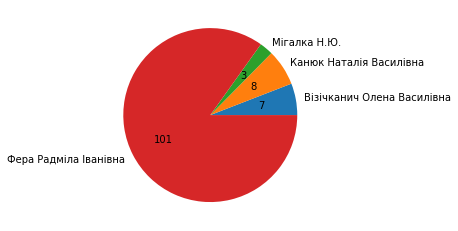

In [18]:
# visualizing result
pie_gr = card_data.groupby('ОператорКод').count()
plt.pie(pie_gr['ВидОперации'], labels=pie_gr.index, autopct=lambda pct: int(119*pct/100))
plt.show()

As we can see only one operator "Фера Радміла Іванівна" has done 101 operations with the same card

In [19]:
# replacing the values with numbers of usage frequency
data['Карта'] = data['Карта'].apply(lambda x:count_card.loc[x]['ВидОперации'])

In [12]:
data = data.drop('ОсновнаяКарта', axis=1)

##### "НомерСтроки"

We will drop this info as it's not important for the model

In [21]:
data = data.drop('НомерСтроки', axis=1)

##### "НоменклатураКод"

We will drop this column as we know that there are only gas products

In [22]:
data = data.drop('НоменклатураКод', axis=1)

##### "Количество", "Цена", "Сумма", "Бонусы", "СуммаСкидки"

These columns we will leave unchanged, just need to convert string into float number

In [23]:
# converting string values to float
data['Количество'] = data['Количество'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Цена'] = data['Цена'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Сумма'] = data['Сумма'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Бонусы'] = data['Бонусы'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['СуммаСкидки'] = data['СуммаСкидки'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))

##### "УниверсальнаяАкцияКод"

In [24]:
# checking unique values
list(data['УниверсальнаяАкцияКод'].unique())

[nan,
 3073.0,
 1980.0,
 3.0,
 4902.0,
 224.0,
 4439.0,
 3068.0,
 3067.0,
 4438.0,
 3865.0,
 294.0,
 4436.0,
 4900.0,
 3834.0,
 4952.0,
 5000.0,
 4441.0]

In [25]:
# replace NaN values
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].fillna(0)

In [26]:
# normalize data for learning

# making list with names
list_disc_types = list(data['УниверсальнаяАкцияКод'].unique())

# replacing string with [0,1,..]
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].apply(lambda x:list_disc_types.index(x))

##### "СписаноБонусов"

We will leave this unchanged

In [27]:
# converting unicode string to integer
data['СписаноБонусов'] = data['СписаноБонусов'].apply(lambda x:int(x.replace('\xa0', '')))

##### "СуммаСкидкиДисконт"

In [28]:
# checking for unique values
data['СуммаСкидкиДисконт'].unique()

array([0])

This column has only 0 values, we will drop it

In [29]:
data = data.drop('СуммаСкидкиДисконт', axis=1)

##### "КассоваяСмена"

This values will not help model, let's drop it

In [30]:
data = data.drop('КассоваяСмена', axis=1)

##### "ОператорКод"

In [31]:
# checking for unique values
data['ОператорКод'].unique()

array(['Циркот І.Я.', 'Лучко Євгенія Олександрівна',
       'Федів Ірина Василівна', 'Бушта Б. І.', 'Кочіш І.І.',
       'Косміна Катерина Нуцівна', 'Бороніна Ольга Анатоліївна',
       'Явисенко Олена Олександрівна', 'Гуля Євген Ігорович',
       'Каричковська Вікторія Іванівна', 'Візічканич Олена Василівна',
       'Вараховба Оксана Василівна', 'Тіщенко Р. В.',
       'Стефанів Оксана Іванівна', 'Хлистун Олена Вікторівна ',
       'Гаєва Л.Д.', 'Турусова Анастасія Володимирівна',
       'Явдошняк Тетяна Андріївна', 'Марко Михайло Юрійович',
       'Гендей М. М. ', 'Макарець О.В.', 'Шрамко Анфіса Петрівна',
       'Карасьова Ольга Вікторівна', 'Співак О.С.',
       'Буднік Олексій Геннадійович', 'Остафійчук.О.В',
       'Процишин Костянтин Петрович', 'Березенко Тетяна Олегівна',
       'Фера Радміла Іванівна', 'Устинський Аркадій Володимирович',
       'Бучинський Степан Олександрович',
       'Рибіцька Ганна Василівна                          ',
       'Петьовка Наталія Василівна', '

In [32]:
# normalize data for learning

# making list with names
list_operators = list(data['ОператорКод'].unique())

# replacing string with [0,1,..]
data['ОператорКод'] = data['ОператорКод'].apply(lambda x:list_operators.index(x))

Also dropping the last useless column 'Unnamed: 19'

In [33]:
data = data.drop('Unnamed: 19', axis=1)

##### Normalized dataset for learning model 

In [34]:
data.head(10)

ВидОперации  АЗСКод  Карта  Количество   Цена    Сумма   Бонусы  \
1             0       0     11        6.72  29.79   200.00    200.0   
6             0       0      3        7.25  30.79   200.00      0.0   
7             1       2      8       16.24  30.79   349.40   1702.0   
8             1       2      7       13.00  30.79   328.00   1599.0   
9             1       2      1       55.00  30.79  1539.00  14997.0   
10            0       0      1       15.00  29.79   446.85   1500.0   
14            0       3     34       10.08  29.79   300.00   1512.0   
18            1       2      7        4.87  29.79    87.70     87.0   
20            0       5      4       18.97  29.79   565.00   2845.0   
21            0       2      3        8.40  29.79   250.00    250.0   

    СуммаСкидки  УниверсальнаяАкцияКод  СписаноБонусов  ОператорКод  
1          0.19                      0               0            0  
6         23.23                      1               0            0  
7        150.63                      0           15063            1  
8         72.27                      0            7200            1  
9        154.45                      0           15417            1  
10         0.00                      0               0            0  
14         0.28                      0               0            2  
18        57.38                      0            5738            1  
20         0.12                      0               0            3  
21         0.24                      0               0            1

### Training model

In [35]:
# importing IsolationForest Algorithm
from sklearn.ensemble import IsolationForest

In [36]:
# creating model
clf = IsolationForest(random_state=0)

In [37]:
# fit model
clf.fit(data.values)

IsolationForest(random_state=0)

### Predicting and analyzing result

In [38]:
# making prediction on the dataset
prediction = clf.predict(data.values)

In [39]:
# replace 1 for inliers, -1 for outliers with 0 for inliers and 1 for outliers
anomaly = np.where(prediction==-1, 1, 0)

In [40]:
# adding column to data frame
data['Anomaly'] = anomaly

In [41]:
# showing result
data.head(10)

ВидОперации  АЗСКод  Карта  Количество   Цена    Сумма   Бонусы  \
1             0       0     11        6.72  29.79   200.00    200.0   
6             0       0      3        7.25  30.79   200.00      0.0   
7             1       2      8       16.24  30.79   349.40   1702.0   
8             1       2      7       13.00  30.79   328.00   1599.0   
9             1       2      1       55.00  30.79  1539.00  14997.0   
10            0       0      1       15.00  29.79   446.85   1500.0   
14            0       3     34       10.08  29.79   300.00   1512.0   
18            1       2      7        4.87  29.79    87.70     87.0   
20            0       5      4       18.97  29.79   565.00   2845.0   
21            0       2      3        8.40  29.79   250.00    250.0   

    СуммаСкидки  УниверсальнаяАкцияКод  СписаноБонусов  ОператорКод  Anomaly  
1          0.19                      0               0            0        0  
6         23.23                      1               0            0        0  
7        150.63                      0           15063            1        1  
8         72.27                      0            7200            1        0  
9        154.45                      0           15417            1        1  
10         0.00                      0               0            0        0  
14         0.28                      0               0            2        0  
18        57.38                      0            5738            1        0  
20         0.12                      0               0            3        0  
21         0.24                      0               0            1        0

In [45]:
# filter data only for anomaly operations
anomaly_data = data[data['Anomaly']==1]

In [59]:
# sorting by operator with the highest anomaly operations
anomaly_sorted = anomaly_data.groupby('ОператорКод').count().sort_values('Anomaly', ascending=False)

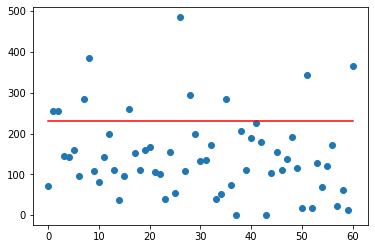

In [66]:
# visualizing result
plt.scatter(anomaly_sorted.index, anomaly_sorted['Anomaly'])
plt.plot([0,60], [230,230], color='red')
plt.show()

We can clearly see that in most cases anomaly frequency is below 230, only few are more than that

Let's filter only those operators who are above the line

In [70]:
# sort only for the highest frequency
anomaly_sorted = anomaly_sorted[anomaly_sorted['Anomaly']>230]
anomaly_sorted

ВидОперации  АЗСКод  Карта  Количество  Цена  Сумма  Бонусы  \
ОператорКод                                                                
26                   485     485    485         485   485    485     485   
8                    385     385    385         385   385    385     385   
60                   365     365    365         365   365    365     365   
51                   343     343    343         343   343    343     343   
28                   294     294    294         294   294    294     294   
7                    285     285    285         285   285    285     285   
35                   284     284    284         284   284    284     284   
16                   261     261    261         261   261    261     261   
1                    256     256    256         256   256    256     256   
2                    255     255    255         255   255    255     255   

             СуммаСкидки  УниверсальнаяАкцияКод  СписаноБонусов  Anomaly  
ОператорКод                                                               
26                   485                    485             485      485  
8                    385                    385             385      385  
60                   365                    365             365      365  
51                   343                    343             343      343  
28                   294                    294             294      294  
7                    285                    285             285      285  
35                   284                    284             284      284  
16                   261                    261             261      261  
1                    256                    256             256      256  
2                    255                    255             255      255

In [80]:
# getting list of operators names
names = []
for name_index in list(anomaly_sorted.index):
    names.append(list_operators[name_index])

In [84]:
# getting list of anomaly quantity
cases = list(anomaly_sorted['Anomaly'].values)

In [92]:
# making dataframe
anomaly_list = pd.DataFrame(data={'Operator':names, 'Anomaly operations':cases})

#### Result

In [93]:
# showing dataframe
anomaly_list

Operator  Anomaly operations
0       Процишин Костянтин Петрович                 485
1               Гуля Євген Ігорович                 385
2        Распутний Артур Сергійович                 365
3                      Тищенко Р.В.                 343
4             Фера Радміла Іванівна                 294
5      Явисенко Олена Олександрівна                 285
6         Співак Олексій Степанович                 284
7  Турусова Анастасія Володимирівна                 261
8       Лучко Євгенія Олександрівна                 256
9             Федів Ірина Василівна                 255

In [33]:
labels = pd.read_csv('other_data/card_69.csv').values

In [35]:
'294408237E2B9930B593D42E92C500DA' in labels

True

In [34]:
labels

array([['E1627DA6992F9BD6D6F10EF15B3930F6'],
       ['D62DF2C0945E73A4E4C32500E3A67AD8'],
       ['0B6E0056D53EB995A3AA1EC87864CD68'],
       ['57C9D9E9319C2DA71B91DA98A8E9669C'],
       ['2A6E9C2543549CA68FE6971099219157'],
       ['FB69355DCE30B5AF1F876678EFAB4E48'],
       ['772735677FFECE1A6CB8A8DA8517A531'],
       ['46C0323D077CB053DAA11506F644CF8B'],
       ['AAA47981E83F0724BFA9F9662FCF017E'],
       ['53B494E840EC934BD47315F6EEE495E7'],
       ['C099389667F182B9F76F15092F88F9C5'],
       ['92431722440CAFCE999CB3516FEE4D8E'],
       ['947A81A687B89B0CAF9C5B975474C6C4'],
       ['6E40B91B57B433863A6F6ADD42F96C9E'],
       ['E4B10D5B33944ECEC4E16F796A94EBEA'],
       ['299FB53DB9DB7219414BD9F1BD8F9043'],
       ['DB4C3A4F07D3F567CEDC11A799B23622'],
       ['0DA097EDB7758A05566786F095F9A394'],
       ['880E63A085D3A74C5274AE4C34366EB9'],
       ['F008DAC8F4E8BE94B1EA91F316DA2A5D'],
       ['A7A4E98BB16320491883DE563BC08F25'],
       ['00DC9FCD81231002E2015CF04A2B01C2'],
       ['8

In [ ]:
for i, row in data